# How to parse mp3 as an array of wave data
> "Audio in python"

- author: <a href=https://www.linkedin.com/in/dmytrokarabash/>Dmytro Karabash</a>, <a href=http://maximk.com//>Maxim Korotkov</a> 
- categories: [python, data science]
- image: images/yomex-owo-Bm7Vm8T4BQs-unsplash.jpg
- permalink: /audio/
- hide: true

In this short post we will share our experiences on working with sound data from python - applying Fourier Transfort to wave data from mp3 and use of some predefined filter. We will use FFMPEG (https://ffmpeg.zeranoe.com/builds/) which you need on your PC and in Jupyter, as well as PDUD and noise reduction technologies from (https://pypi.org/project/noisereduce/)

As usual, if you want to play with the notebook - do that on colab or github.

In [1]:
# hide
# installs
#conda install -c conda-forge ffmpeg

#conda install -c conda-forge pydub

# pip install noisereduce 

In [2]:
# hide
# imports
import pydub
import matplotlib.pyplot as plt
import numpy as np
import os

So, say you have a mp3 which contains data you need to process - in can be sound of a machine working, say you want to see if you can detect malfunctions from its sound - or a bird song. If you get a massive ammount of sounds - it is probably in mp3. We will load it via pydub.

In [3]:
#works with local data
filename = "../data/datasets_847828_1448297_birdvox_wav_00162d26-57e6-4924-a247-5f58963f1403.wav"
disk_file = open(filename, 'rb')
sound = pydub.AudioSegment.from_file(disk_file, format='wav') 
samples = sound.get_array_of_samples()

# get the frame rate
sample_rate = sound.frame_rate
# get amount of bytes contained in one sample
sample_size = sound.sample_width
# get channels
channels = sound.channels
disk_file.close()

print("Channels: ", channels, "Width: ", sample_size, "Rate: ", sample_rate)

Channels:  1 Width:  2 Rate:  44100


You can see visualize it on a plot - your samples are in an array.

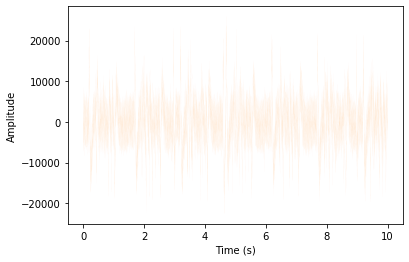

In [4]:


#create a time variable in seconds
time = np.arange(0, float(len(samples)), 1) / sample_rate

#plot amplitude (or loudness) over time

plt.plot(time, samples, linewidth=0.01, alpha=0.7, color='#ff7f00')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.show()

And now we can do apply fourier transform

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


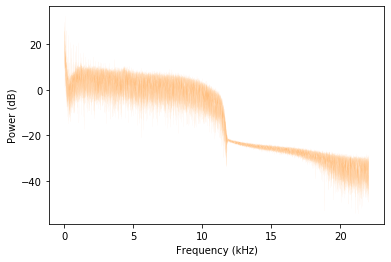

In [5]:
from numpy import fft as fft

fourier=fft.fft(samples)

n = len(samples)
fourier = fourier[0:(int(n/2))]
fourier = fourier / float(n)
freqArray = np.arange(0, (int(n/2)), 1.0) * (sample_rate*1.0/n);

plt.plot(freqArray/1000, 10*np.log10(fourier), color='#ff7f00', linewidth=0.02)
plt.xlabel('Frequency (kHz)')
plt.ylabel('Power (dB)')
plt.show()

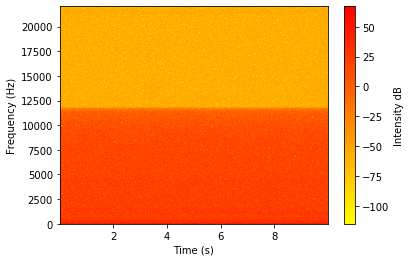

In [6]:
Pxx, freqs, bins, im = plt.specgram(samples, Fs=sample_rate, NFFT=1024, cmap=plt.get_cmap('autumn_r'))
cbar=plt.colorbar(im)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
cbar.set_label('Intensity dB')
plt.show()

Say, you want to pick a frequency and visualize its amplitude

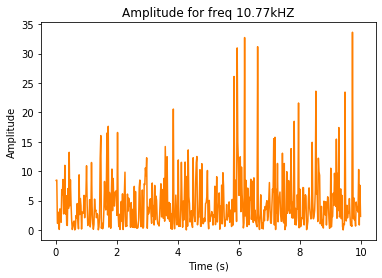

In [7]:
#pick a frequency
i = 250
singlefqcy=Pxx[i,:]
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Amplitude for freq {:.2f}kHZ'.format(freqs[i]/1000))
plt.plot(bins, singlefqcy, color='#ff7f00')

Now, let us reduce noise using noisereduce library

In [8]:
import noisereduce as nr

fconverter = lambda a : a / 32767.0
converted = fconverter(np.asarray(samples, dtype = np.float64))

reduced_noise = nr.reduce_noise(audio_clip=converted, noise_clip=converted, verbose=False)

C:\ProgramData\Anaconda3\lib\site-packages\noisereduce\noisereduce.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


And check that noise is reduced on Fourier Transform results

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


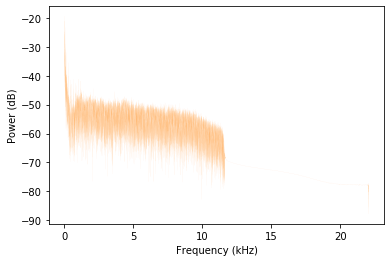

In [9]:
fourier=fft.fft(reduced_noise)

n = len(reduced_noise)

fourier = fourier[0:(int(n/2))]
fourier = fourier / float(n)
freqArray = np.arange(0, (int(n/2)), 1.0) * (sample_rate*1.0/n);

plt.plot(freqArray/1000, 10*np.log10(fourier), color='#ff7f00', linewidth=0.02)
plt.xlabel('Frequency (kHz)')
plt.ylabel('Power (dB)')
plt.show()

And now you can write the noise reduced file to output.

In [10]:
import scipy.io.wavfile
scipy.io.wavfile.write('../output/test-out2.wav',sample_rate,reduced_noise)

<font size="2">
Copyright &copy; Dmytro Karabash, Maxim Korotkov; 2020. <br>  This notebook is licensed under a <a rel="license" href="https://creativecommons.org/licenses/by/4.0/">Creative
Commons Attribution 4.0 International License</a>.
</font>